# Lab  #2

**First and Last Name:** Munevver Coskun

**Student ID:** 500923319

In [ ]:
###############  calling the libraries and Dataset  ##################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, floor,e
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random

df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

NumColmns = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

df[NumColmns] = StandardScaler().fit_transform(df[NumColmns])
df[NumColmns]


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969


EDA setup

In [ ]:
################ EDA ##############

df.info()  #prints info on columns and datatypes


CollectedData= df.to_numpy()
class0, class1, missingValue=0, 0, 0

for row in CollectedData:
  if row[5]=='Present':  #One-Hot-Encoding
    row[5]=1
  if row[5]=='Absent':  #One-Hot-Encoding
    row[5]=0
  if row[10] == 1:  #Counting classes
    class1+=1
  if row[10] == 0:  #Counting classes
    class0+=1
  for i in range(len(row)):
    if row[i] == 'nan' or row[i] == '':   #Counting missing values
      missingValue += 1
  row[0] = 1



#try using "sklearn.preprocessing.OneHotEncoder"

print("Value for class0: ", class0)
print("Value for class1: ", class1)
print("Number of missing values: ", missingValue)

CollectedData



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    float64
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    float64
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    float64
 10  chd        462 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 39.8+ KB
Value for class0:  302
Value for class1:  160
Number of missing values:  0


array([[1, 1.0585635426541133, 1.8230728939909548, ...,
        3.277737970512033, 0.6293357269279048, 1],
       [1, 0.2770892884546519, -0.7902374411811489, ...,
        -0.6127446275326749, 1.383114695640517, 1],
       [1, -0.9928063746194727, -0.7749804167055819, ...,
        -0.5411833016279215, 0.21818356217557108, 0],
       ...,
       [1, -1.481227783494136, -0.1385445385819337, ...,
        0.3923853100323758, 0.8349118093040717, 0],
       [1, -0.9928063746194727, 0.3845534434375033, ...,
        0.2832031727948377, -0.1929686025767627, 0],
       [1, -0.3090164021949441, -0.7924170161062298, ...,
        -0.6969825311691275, 0.21818356217557108, 1]], dtype=object)

Outputs of the questions from EDA part of the manual.

In [ ]:
class0_Percentage = class0/len(CollectedData)*100
class1_Percentage = class1/len(CollectedData)*100

print(f"Percentage of class 1: {class1_Percentage}")
print(f"Percentage of class 0: {class0_Percentage}")
print(f"Total number of missing values: {missingValue}")


Percentage of class 1: 34.63203463203463
Percentage of class 0: 65.36796536796537
Total number of missing values: 0


The number of categorical features in the data is **2** :
- **famhist**(Present and Absent),
- **chd**(1 and 0).

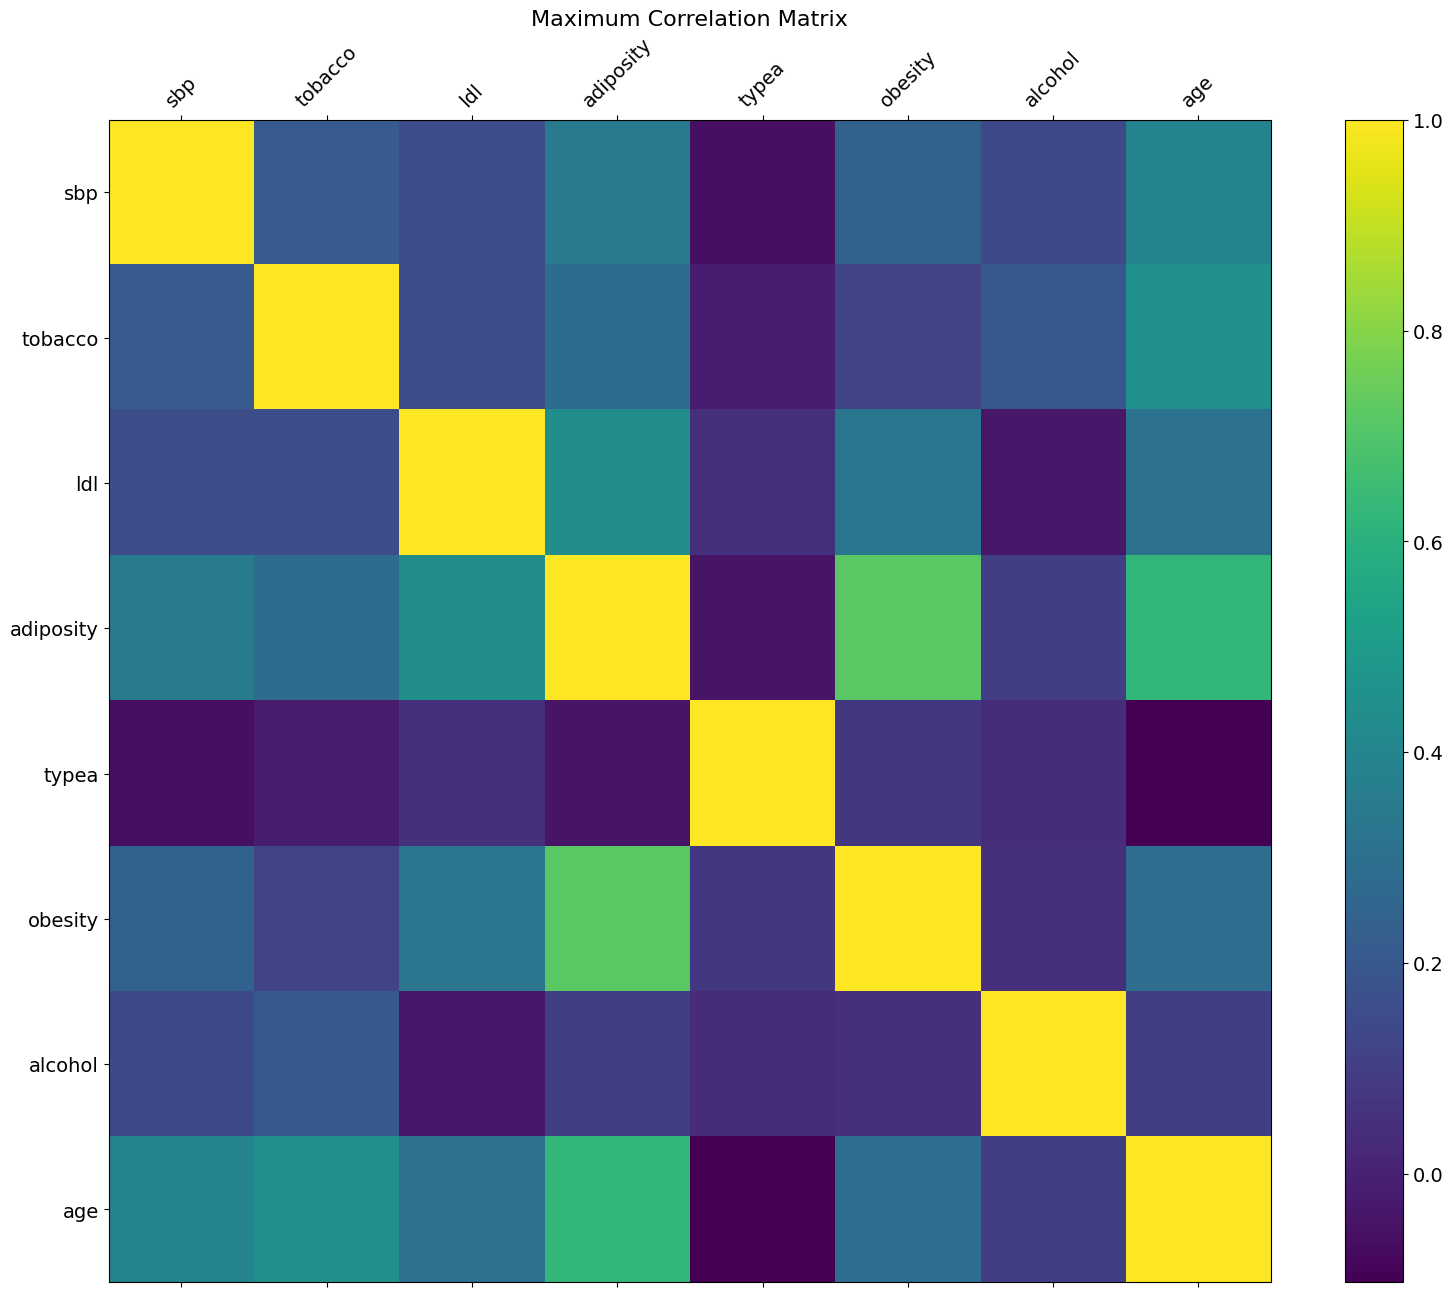

In [ ]:
########## Max Corrolation Matrix #############
f = plt.figure(figsize=(19, 15))
plt.matshow(df[NumColmns].corr(), fignum=f.number)
plt.xticks(range(df[NumColmns].select_dtypes(['number']).shape[1]), df[NumColmns].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df[NumColmns].select_dtypes(['number']).shape[1]), df[NumColmns].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Maximum Correlation Matrix', fontsize=16);
#try to get famhist and takeout the row names


In [ ]:
############  hypothesis model  ##########

theta = [random.uniform(0, 1) for i in range(10)]
theta = np.array(theta)

theta1 = theta.copy()
theta2 = theta.copy()
theta3 = theta.copy()
theta4 = theta.copy()
theta5 = theta.copy()
theta6 = theta.copy()
theta7 = theta.copy()
theta8 = theta.copy()
theta9 = theta.copy()
theta10 = theta.copy()
theta11 = theta.copy()
theta12 = theta.copy()


def hypothesis(theta):
    temp = []

    # Calculates thetas
    for row in CollectedData:
        z = np.dot(theta.T, row[:-1])
        temp.append(1 / (1 + np.exp(-z)))

    h = np.array(temp)
    return h

In [ ]:
################  Cost Function  ###############

def costf(theta):

  sigmoid=hypothesis(theta)

  J=0
  for i in range(len(CollectedData)):
    J += (CollectedData[i][10]*np.log(sigmoid[i]) + (1-CollectedData[i][10])*np.log(1-sigmoid[i]))

  return -(J)/len(CollectedData)


In [ ]:
###########  Initialization + Batch Gradient Descent Iteration  ##########

def gradient_descent(theta, a, epochs, batch=len(CollectedData)):
    costs = []
    print(theta)
    for _ in range(epochs):
        pos = 0
        remainder = len(CollectedData) % batch
        sigmoid = hypothesis(theta)

        while pos+batch <= len(CollectedData):
            for i in range(len(CollectedData[0])-1):
                summation = 0
                for j in range(pos, pos+batch):
                    summation += ((CollectedData[j][10]-sigmoid[j]) * CollectedData[j][i])
                theta[i] = theta[i] + (a/batch * summation)
            pos += batch

        if 0 < pos < len(CollectedData):
            for i in range(len(CollectedData[0])-1):
                summation = 0
                for j in range(pos, pos+remainder):
                    summation += ((CollectedData[j][10]-sigmoid[j]) * CollectedData[j][i])
                theta[i] = theta[i] + (a/remainder * summation)

        costs.append(costf(theta))

    return costs



[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.7606018938250814
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.8013371529492321
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.7215344903376425
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.7965393995518003
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.5366723353267068
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.7215393725678678


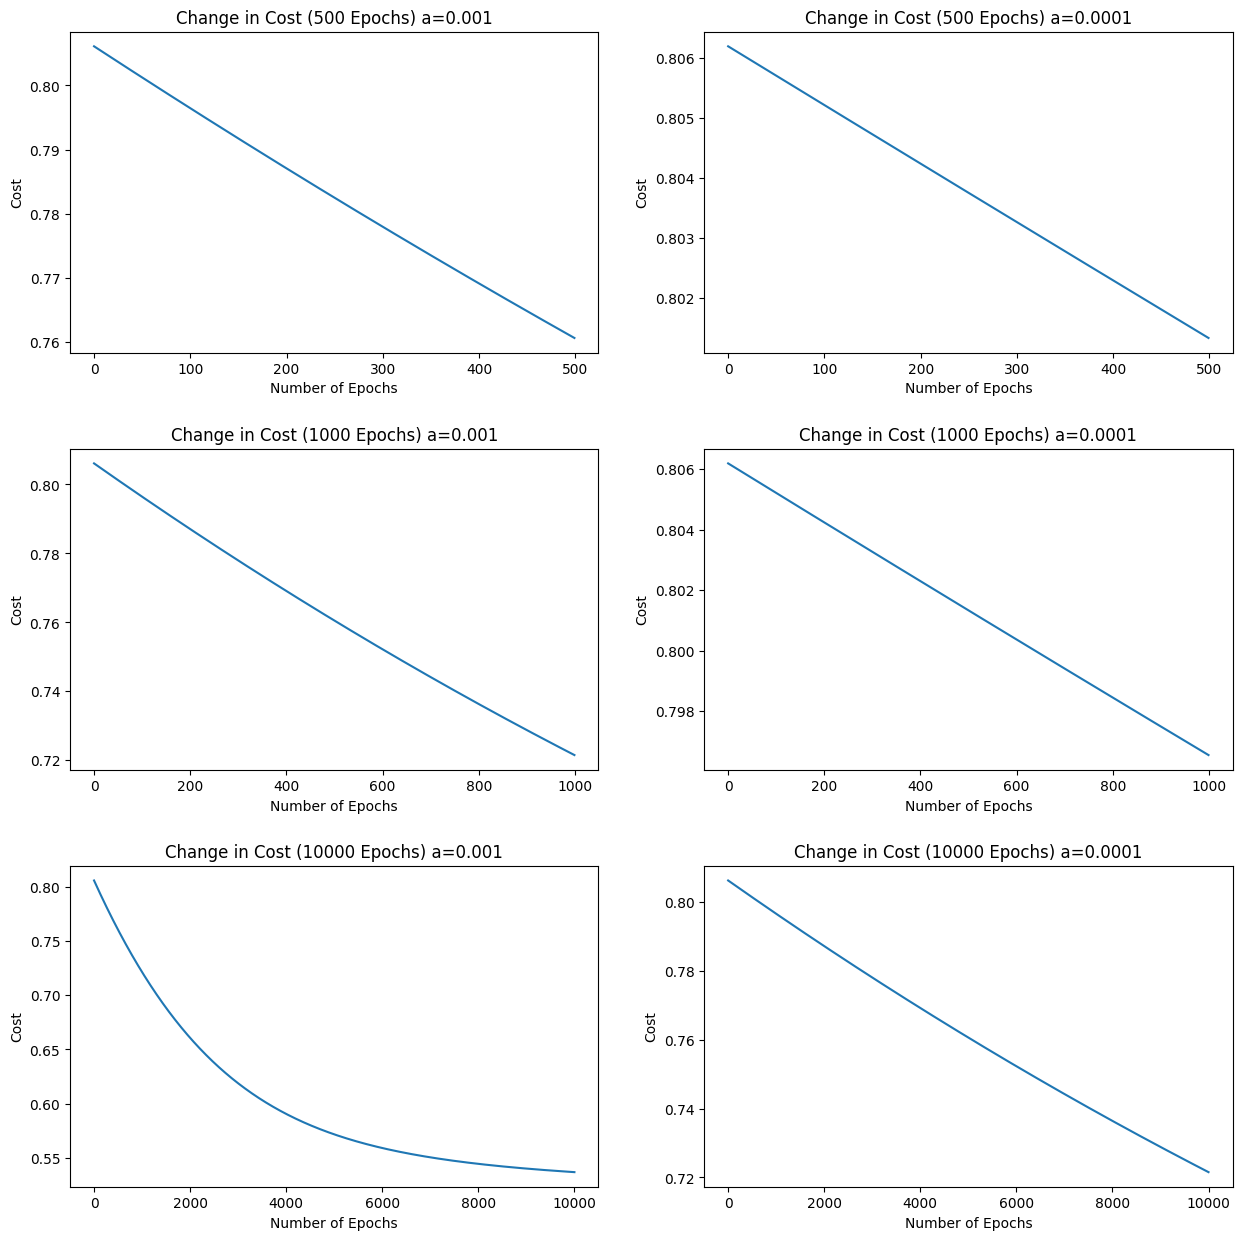

In [ ]:
#################  Batch Gradient Descent Graphs with different Learning Curves  ##############

%matplotlib inline

fig, pos = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3)

costs = gradient_descent(theta1, 0.001, 500)
print(costs[-1])

# Row 0 Left: Cost vs 500 Epochs with a=0.001
pos[0, 0].set_title(f'Change in Cost (500 Epochs) a=0.001')
pos[0, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 0].plot(range(500), costs)

costs = gradient_descent(theta2, 0.0001, 500)
print(costs[-1])

# Row 0 Right: Cost vs 500 Epochs with a=0.0001
pos[0, 1].set_title(f'Change in Cost (500 Epochs) a=0.0001')
pos[0, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 1].plot(range(500), costs)

costs = gradient_descent(theta3, 0.001, 1000)
print(costs[-1])

# Row 1 Left: Cost vs 1000 Epochs with a=0.001
pos[1, 0].set_title(f'Change in Cost (1000 Epochs) a=0.001')
pos[1, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 0].plot(range(1000), costs)

costs = gradient_descent(theta4, 0.0001, 1000)
print(costs[-1])

# Row 1 Right: Cost vs 1000 Epochs with a=0.0001
pos[1, 1].set_title(f'Change in Cost (1000 Epochs) a=0.0001')
pos[1, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 1].plot(range(1000), costs)

costs = gradient_descent(theta5, 0.001, 10000)
print(costs[-1])

# Row 2 Left: Cost vs 10000 Epochs with a=0.001
pos[2, 0].set_title(f'Change in Cost (10000 Epochs) a=0.001')
pos[2, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 0].plot(range(10000), costs)

costs = gradient_descent(theta6, 0.0001, 10000)
print(costs[-1])

# Row 2 Right: Cost vs 10000 Epochs with a=0.0001
pos[2, 1].set_title(f'Change in Cost (10000 Epochs) a=0.0001')
pos[2, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 1].plot(range(10000), costs)

**Question:**

Based on what you see in the learning curve, what value for epoch does seem
reasonable to stop training for each learning rates (cost will not decrease
significantly anymore)?

**Answer:**

According to the above graphs, the 5th graph(10000epochs and a-0.001) shows the optimal point clearer for training to stop. Around 5,000-6,000 epochs with the learning rate of 0.001, the graph starts to decrease not as gradually. That is how we know it is  reaching the optimal learning rate. Stopping around that point can prevent overfitting.

For the rest of the graphs, they don't give a clear idea of what the optimal point would be to stop training. Therefore, we need various learning rates and curves to observe.

[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.5717471236403597
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.7600311986576163
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.5385740740643387
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.7206034352374074
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.5142464158147582
[0.53564699 0.06560895 0.15209784 0.49479129 0.31961387 0.04844496
 0.99451979 0.12411219 0.6408173  0.61966687]
0.5385873712733276


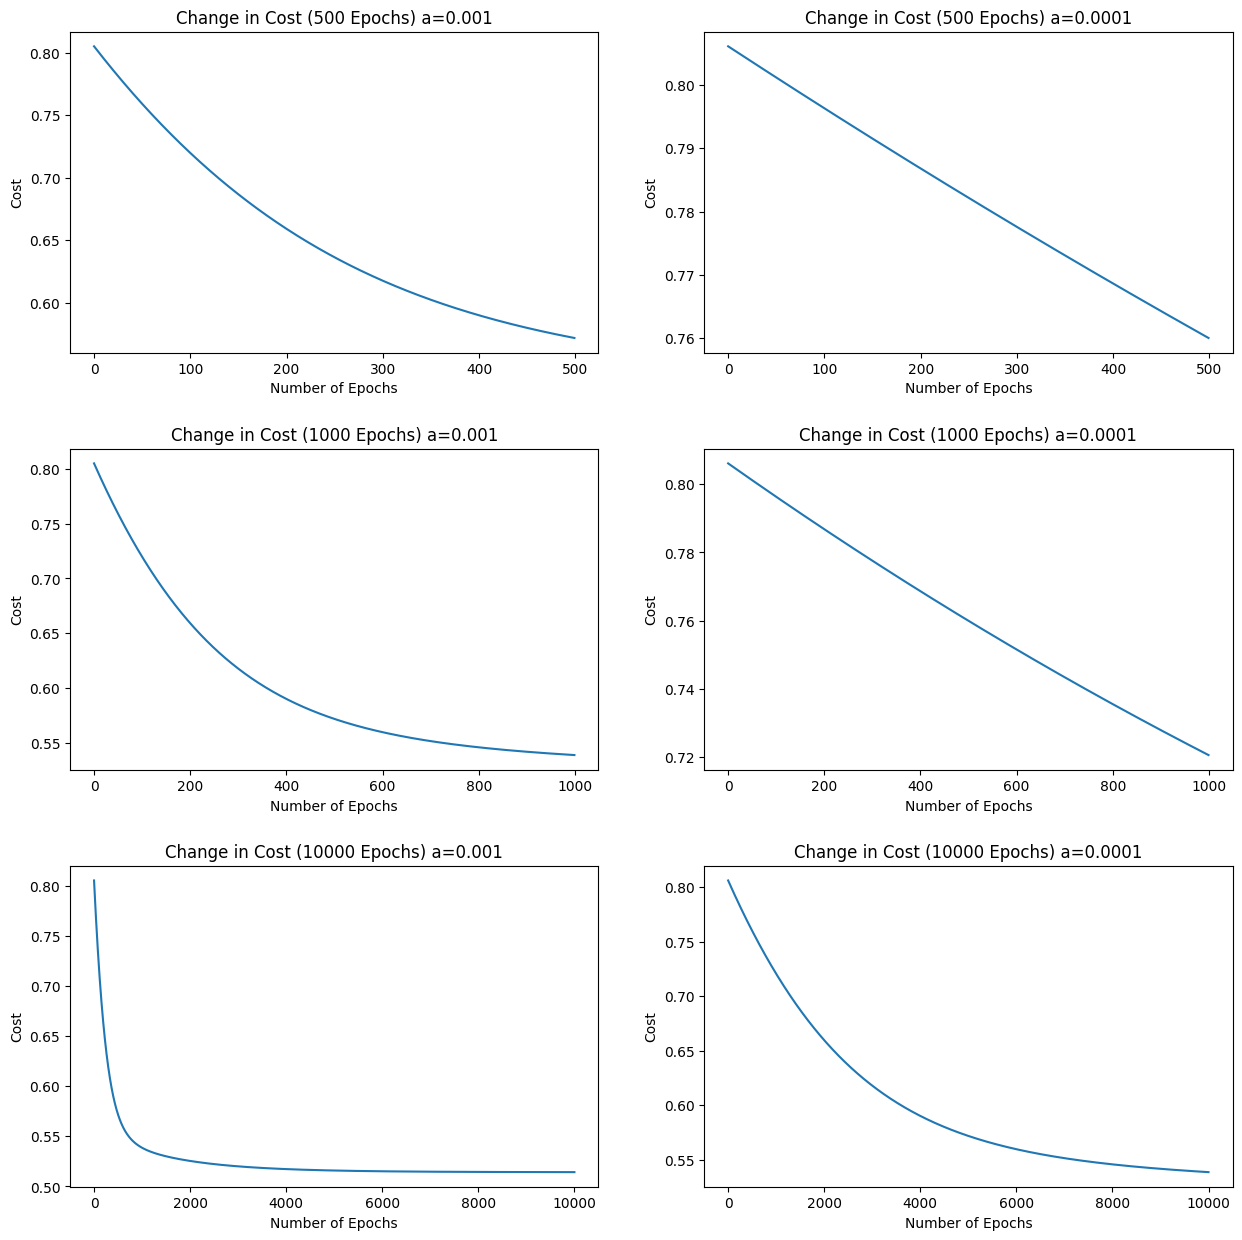

In [ ]:
#################  Mini-Batch Gradient Descent Graphs with different Learning Curves  ##############

%matplotlib inline
# Create four subplots in a 2 by 2 area
fig, pos = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3)

costs = gradient_descent(theta7, 0.001, 500, 50)
print(costs[-1])

# Row 0 Left: Cost vs 500 Epochs with a=0.001
pos[0, 0].set_title(f'Change in Cost (500 Epochs) a=0.001')
pos[0, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 0].plot(range(500), costs)

costs = gradient_descent(theta8, 0.0001, 500, 50)
print(costs[-1])

# Row 0 Right: Cost vs 500 Epochs with a=0.0001
pos[0, 1].set_title(f'Change in Cost (500 Epochs) a=0.0001')
pos[0, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[0, 1].plot(range(500), costs)

costs = gradient_descent(theta9, 0.001, 1000, 50)
print(costs[-1])

# Row 1 Left: Cost vs 1000 Epochs with a=0.001
pos[1, 0].set_title(f'Change in Cost (1000 Epochs) a=0.001')
pos[1, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 0].plot(range(1000), costs)

costs = gradient_descent(theta10, 0.0001, 1000, 50)
print(costs[-1])

# Row 1 Right: Cost vs 1000 Epochs with a=0.0001
pos[1, 1].set_title(f'Change in Cost (1000 Epochs) a=0.0001')
pos[1, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[1, 1].plot(range(1000), costs)

costs = gradient_descent(theta11, 0.001, 10000, 50)
print(costs[-1])

# Row 2 Left: Cost vs 10000 Epochs with a=0.001
pos[2, 0].set_title(f'Change in Cost (10000 Epochs) a=0.001')
pos[2, 0].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 0].plot(range(10000), costs)

costs = gradient_descent(theta12, 0.0001, 10000, 50)
print(costs[-1])

# Row 2 Right: Cost vs 10000 Epochs with a=0.0001
pos[2, 1].set_title(f'Change in Cost (10000 Epochs) a=0.0001')
pos[2, 1].set(xlabel='Number of Epochs', ylabel='Cost')
pos[2, 1].plot(range(10000), costs)

**Question:**

Based on what you see in the learning curve, what value for epoch does seem
reasonable to stop training for each learning rates (cost will not decrease
significantly anymore)?

**Answer:**

For graph1(500epochs and a=0.001), we see around 500 the graph's decrease is nor as gradually as before. That is a good spot to stop learning.

For graph2(500epochs and a=0.0001), we see that the graph is still decreasing gradually even at 500. At this point we would still continue the learning process with different learning rates.

For graph3(1000epochs and a=0.001), we see the curve is flattening towards 500. That might be a good point to stop training.

For graph4(1000epochs and a=0.0001), we see that the graph is still decreasing gradually even at 1000. At this point we would still continue the training process but observe it with different learning rates.

For graph5(10000epochs and a=0.001), we cannot see clearly or can say for sure at what point it stops decreasing, however, we can guess around 600-700, the graph flattens.

For graph6(10000epochs and a=0.0001), we see that the graph is slower to decrease around 5000. Stopping arounf that point can prevent overfitting.



In [ ]:
#####################  Logistic Regression  ########################
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

NumColmns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

x = df[NumColmns]
x = pd.get_dummies(x)

y = df['chd']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

LogReg = LogisticRegression(random_state=0).fit(x, y)
LogReg.score(x_test, y_test)


0.7526881720430108